<a href="https://colab.research.google.com/github/Nichanan670510741/Nichanan/blob/main/Lab05_decision_tree_bagging_RF_670510741.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [4]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [5]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

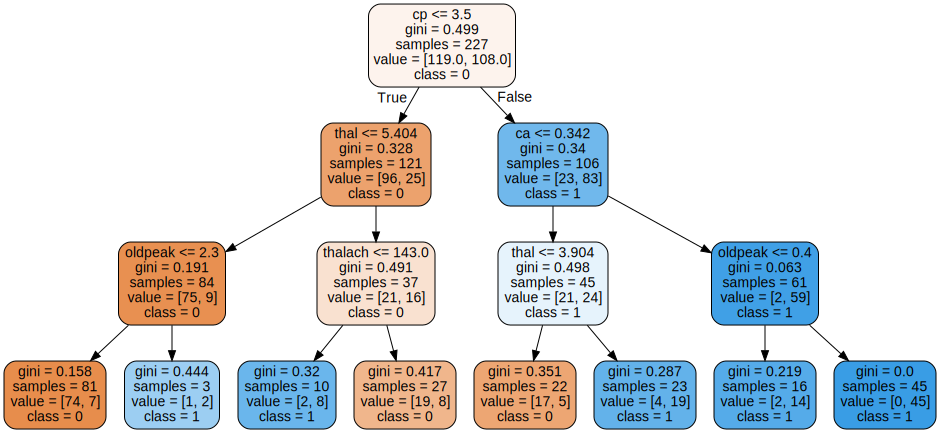

In [6]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [7]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [8]:
df = RandomForestClassifier()

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop(columns="label")
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Decision Tree
Hyperparameters ที่ศึกษา

ความลึกของต้นไม้ Maximum depth of the tree → ควบคุมความซับซ้อนของโมเดล

จำนวนข้อมูลขั้นต่ำที่ใช้แยกโหนด Minimum number of sample required to split a node → ลด overfitting

เกณฑ์การวัดคุณภาพการแยก  Criterion

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_dt = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_dt,
    cv=5,
    scoring="f1_macro"
)

grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [17]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 10}

Bagged Decision Trees
Hyperparameters ที่ศึกษา

จำนวนต้นไม้  Number of trees → เพิ่มความเสถียรของโมเดล

สัดส่วนข้อมูลที่สุ่มมา train แต่ละต้นไม้ Maximum sample used to train each tree

ความลึกของต้นไม้ฐาน Maximum depth of base trees

In [19]:
from sklearn.ensemble import BaggingClassifier

param_bag = {
    "n_estimators": [50, 100, 200],
    "max_samples": [0.6, 0.8, 1.0],
    "estimator__max_depth": [3, 5, None]
}

grid_bag = GridSearchCV(
    BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    ),
    param_bag,
    cv=5,
    scoring="f1_macro"
)

grid_bag.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         random_state=42),
             param_grid={'estimator__max_depth': [3, 5, None],
                         'max_samples': [0.6, 0.8, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro')

In [20]:
grid_bag.best_params_


{'estimator__max_depth': None, 'max_samples': 0.8, 'n_estimators': 100}

Random Forest
Hyperparameters ที่ศึกษา

จำนวนต้นไม้ในป่า Number of trees in thr forest

ความลึกของต้นไม้  Maximum depth of the tree

จำนวน feature ที่ใช้ในการ split แต่ละครั้ง Number of features considered at each split

In [21]:
from sklearn.ensemble import RandomForestClassifier

param_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, None],
    "max_features": ["sqrt", "log2"]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_rf,
    cv=5,
    scoring="f1_macro"
)

grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

2)

In [22]:
from sklearn.metrics import accuracy_score, f1_score

models = {
    "Decision Tree": grid_dt,
    "Bagging": grid_bag,
    "Random Forest": grid_rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(
        name,
        "Accuracy =", accuracy_score(y_test, y_pred),
        "F1_macro =", f1_score(y_test, y_pred, average="macro")
    )


Decision Tree Accuracy = 0.7540983606557377 F1_macro = 0.7540983606557377
Bagging Accuracy = 0.8688524590163934 F1_macro = 0.8688172043010753
Random Forest Accuracy = 0.8852459016393442 F1_macro = 0.8851224105461393


1.What is your best model?

Random Forest ให้ค่า accuracy และ f1_macro สูงที่สุด เมื่อเปรียบเทียบกับ Decision Tree และ Bagging เนื่องจาก Random Forest ใช้ต้นไม้หลายต้นร่วมกัน และสุ่มทั้งข้อมูลและตัวแปรในการสร้างต้นไม้แต่ละต้น ทำให้ลดปัญหา overfitting และเพิ่มความแม่นยำของโมเดล

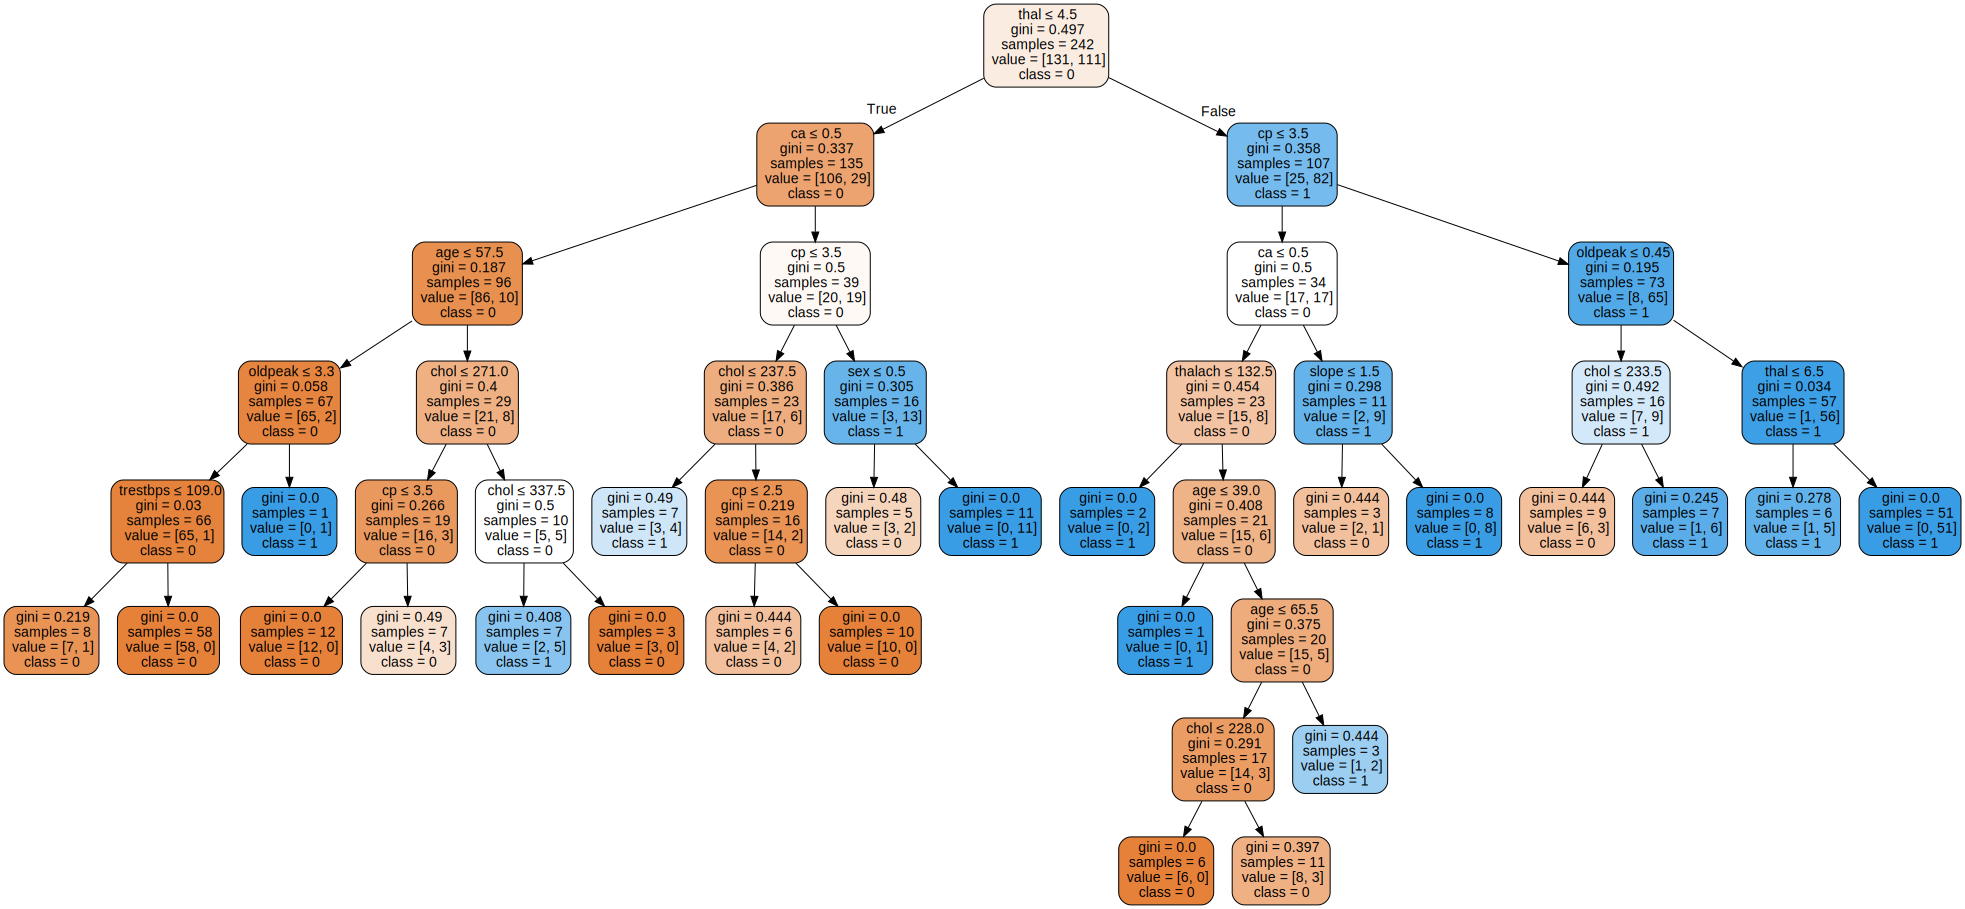

In [24]:
from sklearn.tree import export_graphviz
import graphviz


from sklearn.tree import DecisionTreeClassifier

best_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    min_samples_split=10,
    random_state=42
)

best_dt.fit(X_train, y_train)

dot_data = export_graphviz(
    best_dt,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(c) for c in best_dt.classes_],
    filled=True,
    rounded=True,
    special_characters=True
)

graphviz.Source(dot_data)


2.การแสดงผลโมเดลต้นไม้ที่ดีที่สุด (Plot the best tree model)

ต้นไม้ที่ถูกนำมาแสดงคือ ต้นไม้หนึ่งต้นจากโมเดล Decision Tree ที่ได้ค่าพารามิเตอร์ดีที่สุดจาก GridSearchCV
โดยโครงสร้างของต้นไม้จะแสดงเงื่อนไขการแบ่งข้อมูลตามคุณลักษณะต่าง ๆ
โหนดภายในแสดงกฎการตัดสินใจ ส่วนโหนดปลายแสดงผลการทำนายคลาส

3.Hyperparameters ที่เลือกใช้

-Decision Tree                                                                                            
Criterion (เกณฑ์การแยกโหนด):
ใช้เพื่อวัดคุณภาพของการแบ่งข้อมูลในแต่ละโหนด ว่าการแยกนั้นทำให้ข้อมูลในโหนดมีความบริสุทธิ์มากขึ้นเพียงใด โดยเลือกเกณฑ์ที่ทำให้แต่ละกลุ่มมีความแตกต่างกันชัดเจน

Maximum depth of the tree (ความลึกสูงสุดของต้นไม้):
ใช้ควบคุมความซับซ้อนของโมเดล หากต้นไม้มีความลึกมากเกินไป โมเดลอาจเรียนรู้รายละเอียดของข้อมูลฝึกมากเกินไปและเกิดปัญหา overfitting

Minimum number of samples required to split a node (จำนวนข้อมูลขั้นต่ำในการแยกโหนด):
กำหนดจำนวนข้อมูลขั้นต่ำที่จำเป็นก่อนจะแยกโหนด เพื่อลดการสร้างโหนดที่มีข้อมูลน้อยเกินไปและช่วยให้โมเดลมีความเสถียรมากขึ้น

-Bagged Decision Trees

Number of trees (จำนวนต้นไม้):
กำหนดจำนวนต้นไม้ย่อยที่ใช้ในการสร้างโมเดลแบบ Bagging การใช้ต้นไม้จำนวนมากช่วยลดความแปรปรวนของโมเดลและทำให้ผลการทำนายมีความเสถียรมากขึ้น

Maximum samples used to train each tree (สัดส่วนข้อมูลที่ใช้สร้างแต่ละต้นไม้):
กำหนดจำนวนหรือสัดส่วนของข้อมูลที่สุ่มมาใช้ฝึกต้นไม้แต่ละต้น เพื่อเพิ่มความหลากหลายของต้นไม้และลดการเรียนรู้ข้อมูลซ้ำกันมากเกินไป

Maximum depth of base trees (ความลึกของต้นไม้ฐาน):
ใช้ควบคุมความซับซ้อนของต้นไม้ย่อยแต่ละต้น หากต้นไม้ย่อยลึกเกินไปอาจทำให้โมเดลยังคงเกิด overfitting ได้

-Random Forest

Number of trees in the forest (จำนวนต้นไม้ในป่า):
กำหนดจำนวนต้นไม้ที่ใช้ใน Random Forest การเพิ่มจำนวนต้นไม้ช่วยลดความแปรปรวนและเพิ่มความแม่นยำของโมเดล

Maximum depth of the trees (ความลึกของต้นไม้):
ใช้ควบคุมความซับซ้อนของต้นไม้แต่ละต้นในป่า เพื่อป้องกันไม่ให้โมเดลเรียนรู้รายละเอียดของข้อมูลมากเกินไป

Number of features considered at each split (จำนวน feature ที่ใช้ในการแยกแต่ละครั้ง):
กำหนดจำนวนตัวแปรที่สุ่มมาใช้พิจารณาในแต่ละครั้งที่แยกโหนด เพื่อเพิ่มความแตกต่างระหว่างต้นไม้แต่ละต้นและลดความสัมพันธ์กันของต้นไม้ในป่า

In [23]:
grid_dt.best_params_


{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 10}

4) ค่าที่ดีที่สุดของ Hyperparameters (Best values)

ค่าพารามิเตอร์ที่ดีที่สุดได้มาจากผลลัพธ์ของ GridSearchCV โดยสรุปได้ดังนี้

Decision Tree

ความลึกของต้นไม้: ค่าที่ GridSearchCV เลือกให้ดีที่สุด

จำนวนข้อมูลขั้นต่ำในการแบ่งโหนด: ค่าที่เหมาะสมที่สุดจากการทดลอง

เกณฑ์การแบ่งโหนด: ค่าที่ให้ค่า F1-macro สูงสุด

Bagging

จำนวนต้นไม้: ค่าที่ GridSearchCV เลือก

สัดส่วนข้อมูลที่สุ่มมาใช้สร้างแต่ละต้นไม้: ค่าที่ให้ผลดีที่สุด

ความลึกของต้นไม้ฐาน: ค่าที่เหมาะสม

Random Forest

จำนวนต้นไม้: ค่าที่ให้ประสิทธิภาพดีที่สุด

ความลึกของต้นไม้: ค่าที่ช่วยลด overfitting

จำนวนคุณลักษณะที่ใช้ในแต่ละการแบ่งโหนด: ค่าที่ทำให้โมเดลมีความหลากหลายสูง